Import Libraries

In [3]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numerize import numerize
import missingno as mso # missging values visualization

# Preprocessing
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Metrics
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Time
import time

# Stats
from scipy.stats import norm
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

# Warnings
import warnings
warnings.filterwarnings("ignore")


from zipfile import ZipFile
import zipfile


Unzip Zip File

In [8]:
#Zipping File

with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('D:\\vscode\\Credit Card Fraud Detection Dataset 2023')

Load Dataset

In [9]:
df=pd.read_csv(r'creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [10]:
#Data Size

print(f"Data set Size: {df.shape[0]} rows and {df.shape[1]} columns")

Data set Size: 568630 rows and 31 columns


In [11]:
#Data set information 
print("=="*25)
print(" "*15, "Data set information" )
print("=="*25)
print(df.info())


                Data set information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568

EDA

In [12]:
#Check Dublicates

print(f"Number of Dublicates Rows are:{df.duplicated().sum()}")

Number of Dublicates Rows are:0


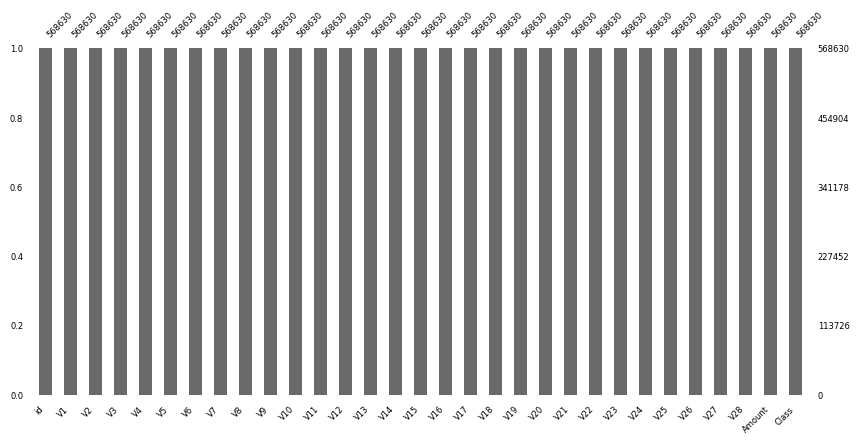

In [13]:
# Checking missing values
fig,ax = plt.subplots(figsize = (10,4.5))
mso.bar(df, fontsize = 6, ax = ax)
fig.show()

In [15]:
#Drop id column as it is not valuable for dataset and prediction 
df.drop(columns=['id'],inplace=True)

In [17]:
#include float values for plotting
cols_to_plot = df.select_dtypes(include = ["float"]).columns.to_list()
print(f"Total columnas: {len(cols_to_plot)}")
cols_to_plot

Total columnas: 29


['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [19]:
#Descriptive Stats
df[cols_to_plot].describe().T

,count,mean,std,min,25%,50%,75%,max
V1,568630.0,-5.638058e-17,1.000001,-3.495584,-0.565286,-0.093638,0.832658,2.229046
V2,568630.0,-1.319545e-16,1.000001,-49.966572,-0.486678,-0.135894,0.343555,4.361865
V3,568630.0,-3.518788e-17,1.000001,-3.183760,-0.649299,0.000353,0.628538,14.125834
V4,568630.0,-2.879008e-17,1.000001,-4.951222,-0.656020,-0.073762,0.707005,3.201536
V5,568630.0,7.997245e-18,1.000001,-9.952786,-0.293496,0.081088,0.439737,42.716891
V6,568630.0,-3.958636e-17,1.000001,-21.111108,-0.445871,0.078718,0.497788,26.168402
V7,568630.0,-3.198898e-17,1.000001,-4.351839,-0.283533,0.233366,0.525955,217.873038
V8,568630.0,2.109273e-17,1.000001,-10.756342,-0.192257,-0.114524,0.047299,5.958040
V9,568630.0,3.998623e-17,1.000001,-3.751919,-0.568745,0.092526,0.559262,20.270062
V10,568630.0,1.991314e-16,1.000001,-3.163276,-0.590101,0.262614,0.592460,31.722709


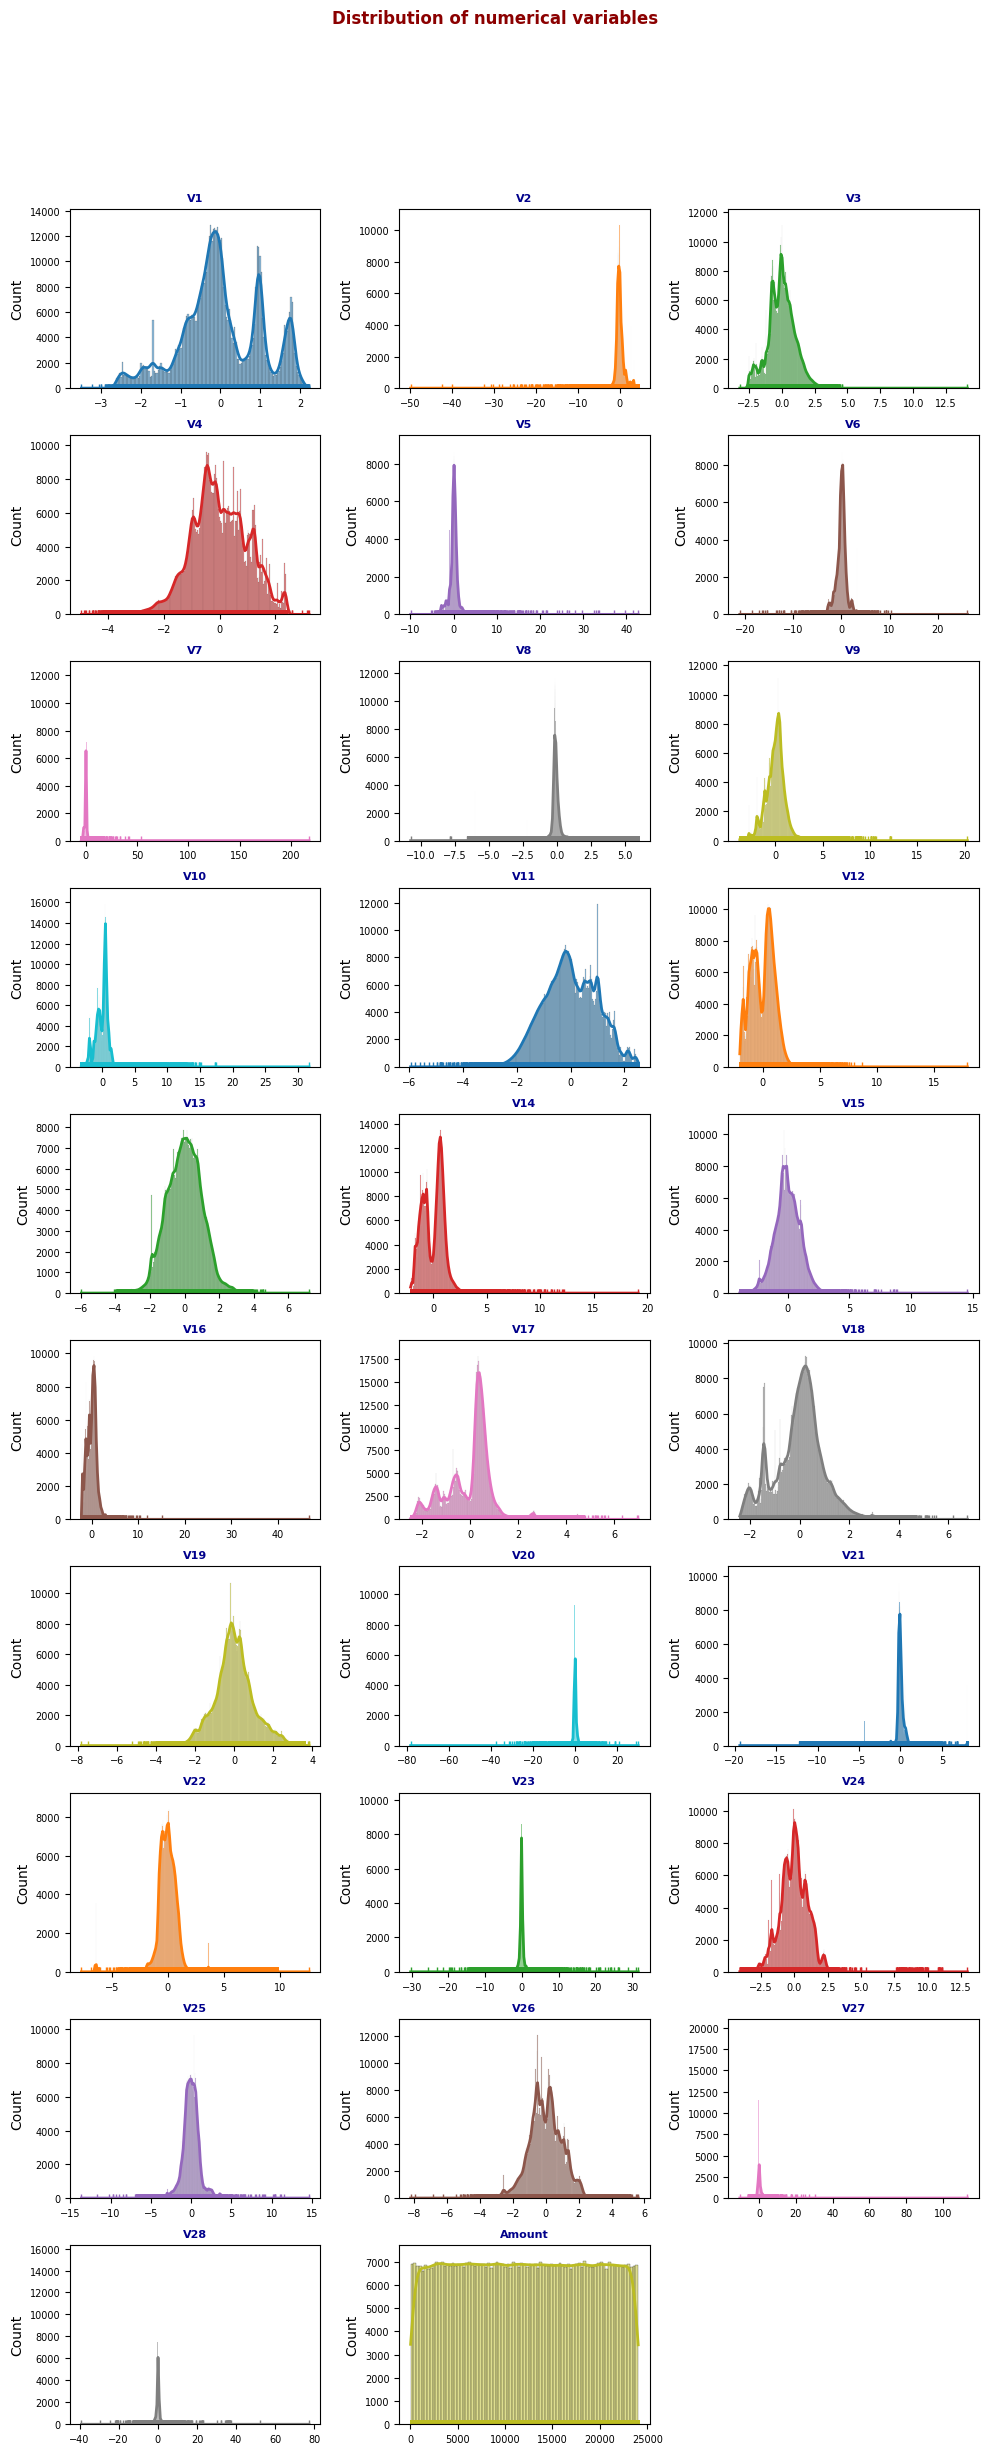

In [25]:
fig,axes = plt.subplots(nrows = 10, ncols = 3, figsize = (10, 25))
axes = axes.flat


for i,col in enumerate(cols_to_plot):
    sns.histplot(
        df,
        x=col,
        kde=True,
        line_kws={"linewidth":2.0},
        stat="count",
        color = (list(plt.rcParams['axes.prop_cycle'])*5)[i]["color"],
        ax = axes[i]
    )
    

    sns.rugplot(
        df, 
        x = col, 
        color = (list(plt.rcParams['axes.prop_cycle'])*5)[i]["color"],
        ax = axes[i]
    )
    
    axes[i].set_xlabel("")
    axes[i].set_title(f"{col}", fontsize = 8, fontweight = "bold", color = "darkblue")
    axes[i].tick_params(labelsize = 7)

fig.delaxes(axes[29])
fig.suptitle("Distribution of numerical variables", fontsize = 12, fontweight = "bold", color = "darkred")
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

In [26]:
# Now let's check your skewness and kurtosis of each numerical variable.
for col in cols_to_plot:
    print(f"{col}:")
    print(f"Skewness = {df[col].skew()}")
    print(f"Kurtosis = {df[col].kurt()}")
    print("=="*20)

V1:
Skewness = -0.08341717301015879
Kurtosis = -0.19551088568279074
V2:
Skewness = -1.397951923713946
Kurtosis = 54.50647846202814
V3:
Skewness = 0.014622213363246254
Kurtosis = 0.28868614603280385
V4:
Skewness = -0.04416892714770696
Kurtosis = -0.10335451793576445
V5:
Skewness = 1.5064136757634041
Kurtosis = 47.09935165702095
V6:
Skewness = -0.2016110101307477
Kurtosis = 4.4905101732511685
V7:
Skewness = 19.026866097533325
Kurtosis = 4017.608217329162
V8:
Skewness = 0.2999722258586845
Kurtosis = 18.939201932362025
V9:
Skewness = 0.17105746155506976
Kurtosis = 3.6393235693250436
V10:
Skewness = 0.7404135529207346
Kurtosis = 13.164784821929029
V11:
Skewness = -0.02089056131978458
Kurtosis = -0.3749301739295974
V12:
Skewness = 0.06675895200237957
Kurtosis = -0.21380828444874433
V13:
Skewness = 0.014906385371884177
Kurtosis = -0.007776940607126193
V14:
Skewness = 0.2078348004501865
Kurtosis = 0.8994629656844437
V15:
Skewness = 0.0112329832827567
Kurtosis = 0.40217237781525084
V16:
Skewnes

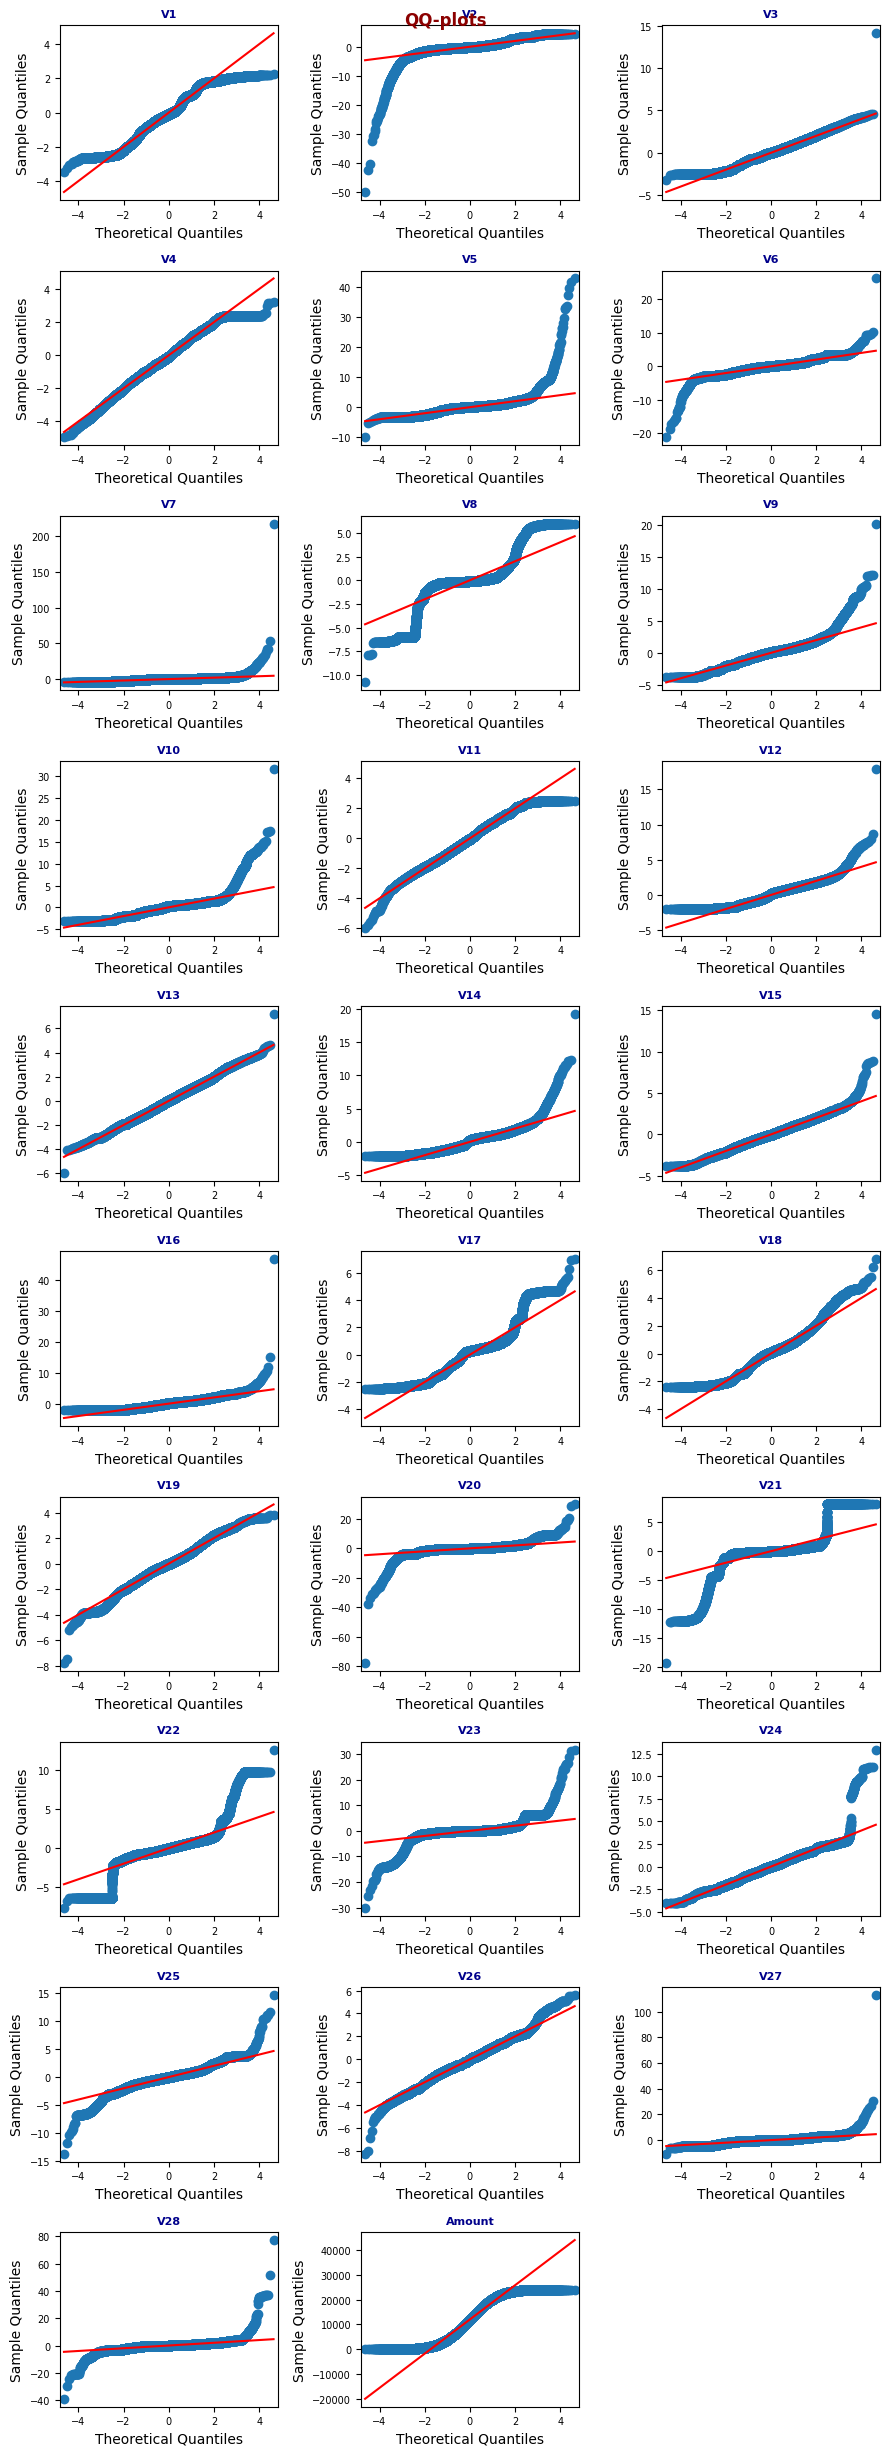

In [27]:
fig,axes = plt.subplots(nrows = 10, ncols = 3, figsize = (9, 25))
axes = axes.flat

for i,col in enumerate(cols_to_plot):
    qqplot(
        df[col],
        line = "s",
        ax = axes[i]
          )
    
    axes[i].set_title(f"{col}", 
                      fontsize = 8, 
                      fontweight = "bold", 
                      color = "darkblue")
    axes[i].tick_params(labelsize = 7)
    
    
fig.delaxes(axes[29])
fig.suptitle("QQ-plots", fontsize = 12, fontweight = "bold", color = "darkred")
fig.tight_layout()
fig.show()

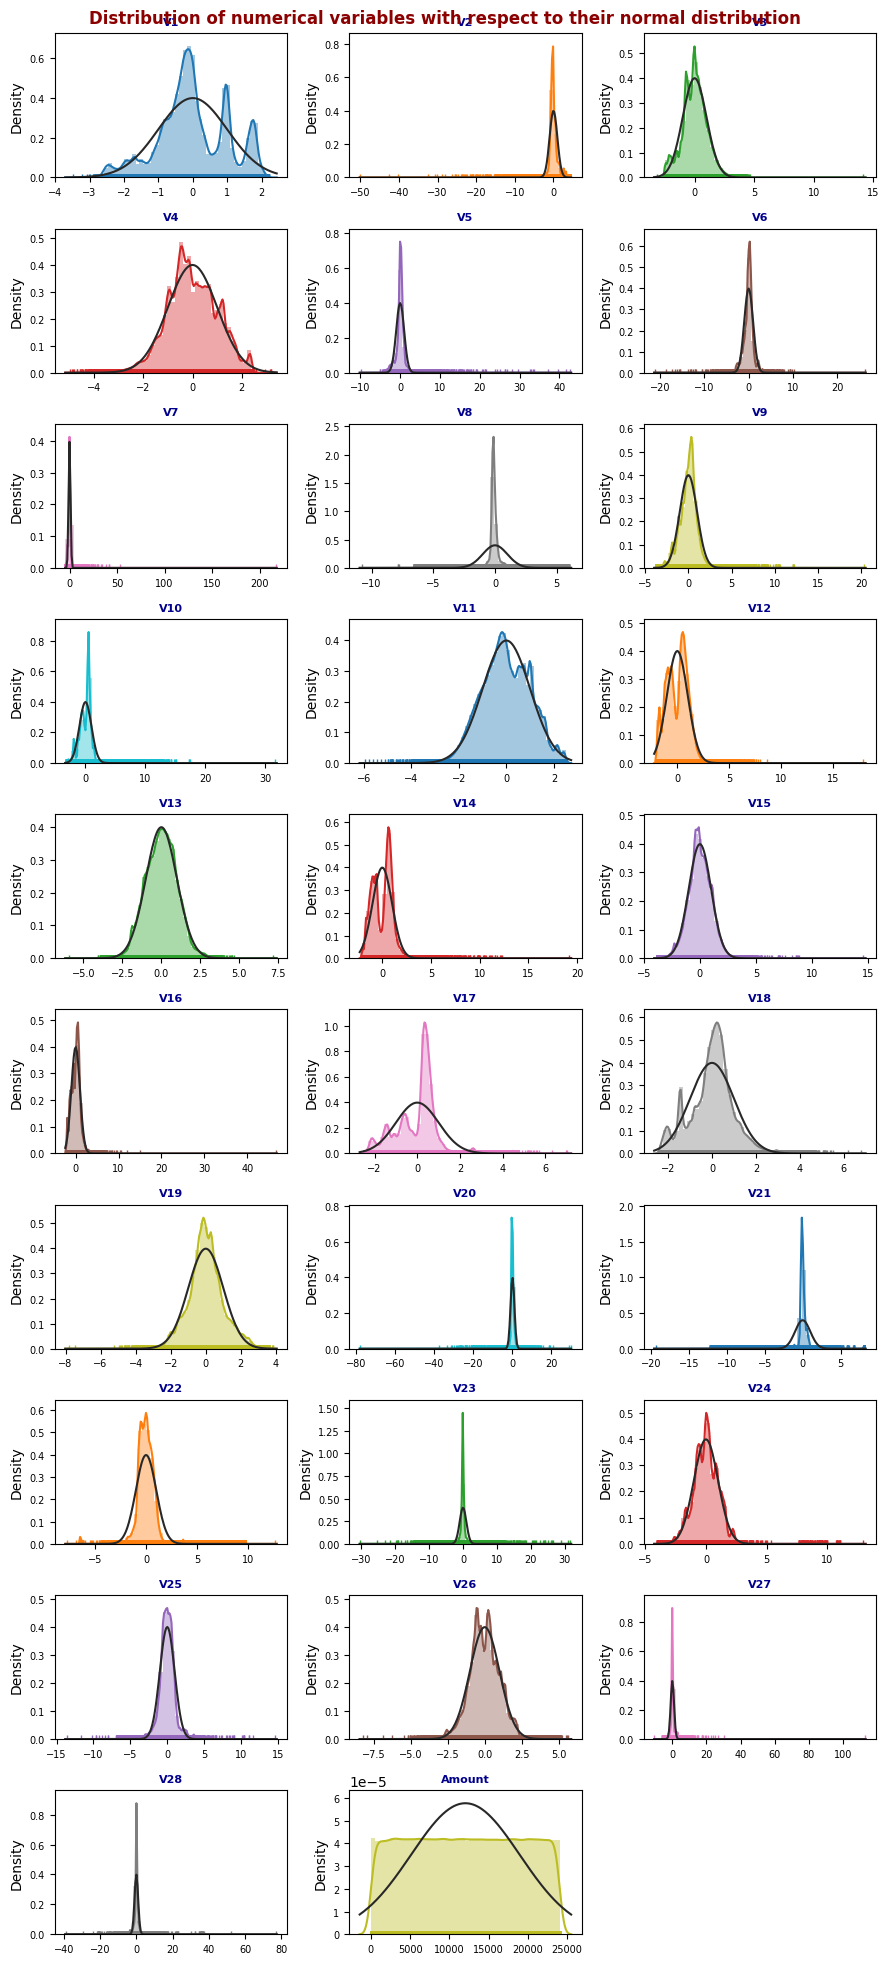

In [28]:
fig,axes = plt.subplots(nrows = 10, ncols = 3, figsize = (9, 20))
axes = axes.flat

for i,col in enumerate(cols_to_plot):
    sns.distplot(
    df[col],
    rug = True, 
    fit = norm, 
    color = (list(plt.rcParams['axes.prop_cycle'])*5)[i]["color"],
    ax = axes[i]
    )
    
    axes[i].set_xlabel("")
    axes[i].set_title(f"{col}", fontsize = 8, fontweight = "bold", color = "darkblue")
    axes[i].tick_params(labelsize = 7)
    
    
fig.delaxes(axes[29])
fig.suptitle("Distribution of numerical variables with respect to their normal distribution", fontsize = 12, fontweight = "bold", color = "darkred")
fig.tight_layout()
fig.show()

In [29]:
# Let's check with a 95% confidence level if the variables come from a normal distribution.
# We will use shapiro test.
for col in cols_to_plot:
  p_value = shapiro(df[col])[1]
  result = 'No Normal Distribution' if p_value < 0.05 else 'Normal Distribution'
  print(f'* {col}: p-value = {p_value} => {result}')

* V1: p-value = 0.0 => No Normal Distribution
* V2: p-value = 0.0 => No Normal Distribution
* V3: p-value = 0.0 => No Normal Distribution
* V4: p-value = 0.0 => No Normal Distribution
* V5: p-value = 0.0 => No Normal Distribution
* V6: p-value = 0.0 => No Normal Distribution
* V7: p-value = 0.0 => No Normal Distribution
* V8: p-value = 0.0 => No Normal Distribution
* V9: p-value = 0.0 => No Normal Distribution
* V10: p-value = 0.0 => No Normal Distribution
* V11: p-value = 0.0 => No Normal Distribution
* V12: p-value = 0.0 => No Normal Distribution
* V13: p-value = 1.9442496307594903e-28 => No Normal Distribution
* V14: p-value = 0.0 => No Normal Distribution
* V15: p-value = 0.0 => No Normal Distribution
* V16: p-value = 0.0 => No Normal Distribution
* V17: p-value = 0.0 => No Normal Distribution
* V18: p-value = 0.0 => No Normal Distribution
* V19: p-value = 0.0 => No Normal Distribution
* V20: p-value = 0.0 => No Normal Distribution
* V21: p-value = 0.0 => No Normal Distribution
* V

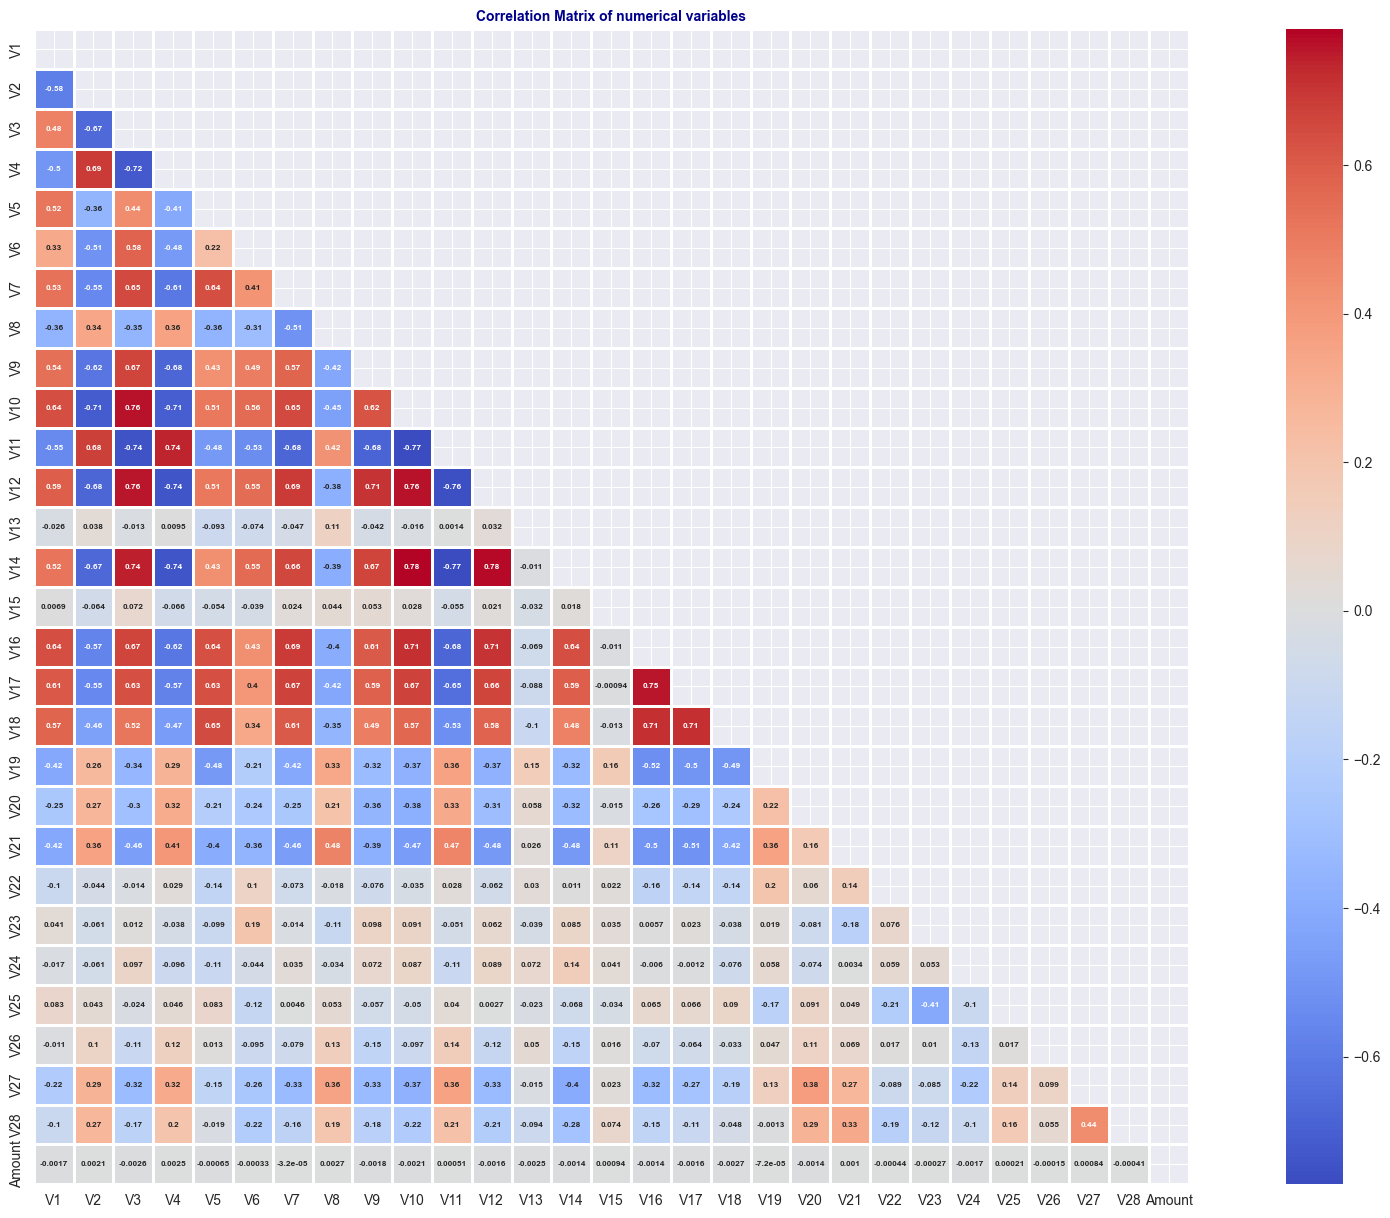

In [30]:
# We generate a correlation matrix between each pair of variables, we will use the Spearman correlation since the variables do not come from a normal distribution.
sns.set_style("darkgrid")
corr_matrix = df[cols_to_plot].corr(method = "spearman")
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

fig,ax = plt.subplots(figsize = (25,15))

sns.heatmap(corr_matrix,
            cmap = "coolwarm",
            annot = True,
            annot_kws = {"fontsize":6, "fontweight":"bold"},
            square = True,
            mask = mask,
            linewidths = 1.0,
            linecolor = "white",
            ax = ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.set_title('Correlation Matrix of numerical variables', fontsize = 10, fontweight = 'bold', color = 'darkblue')
fig.show()

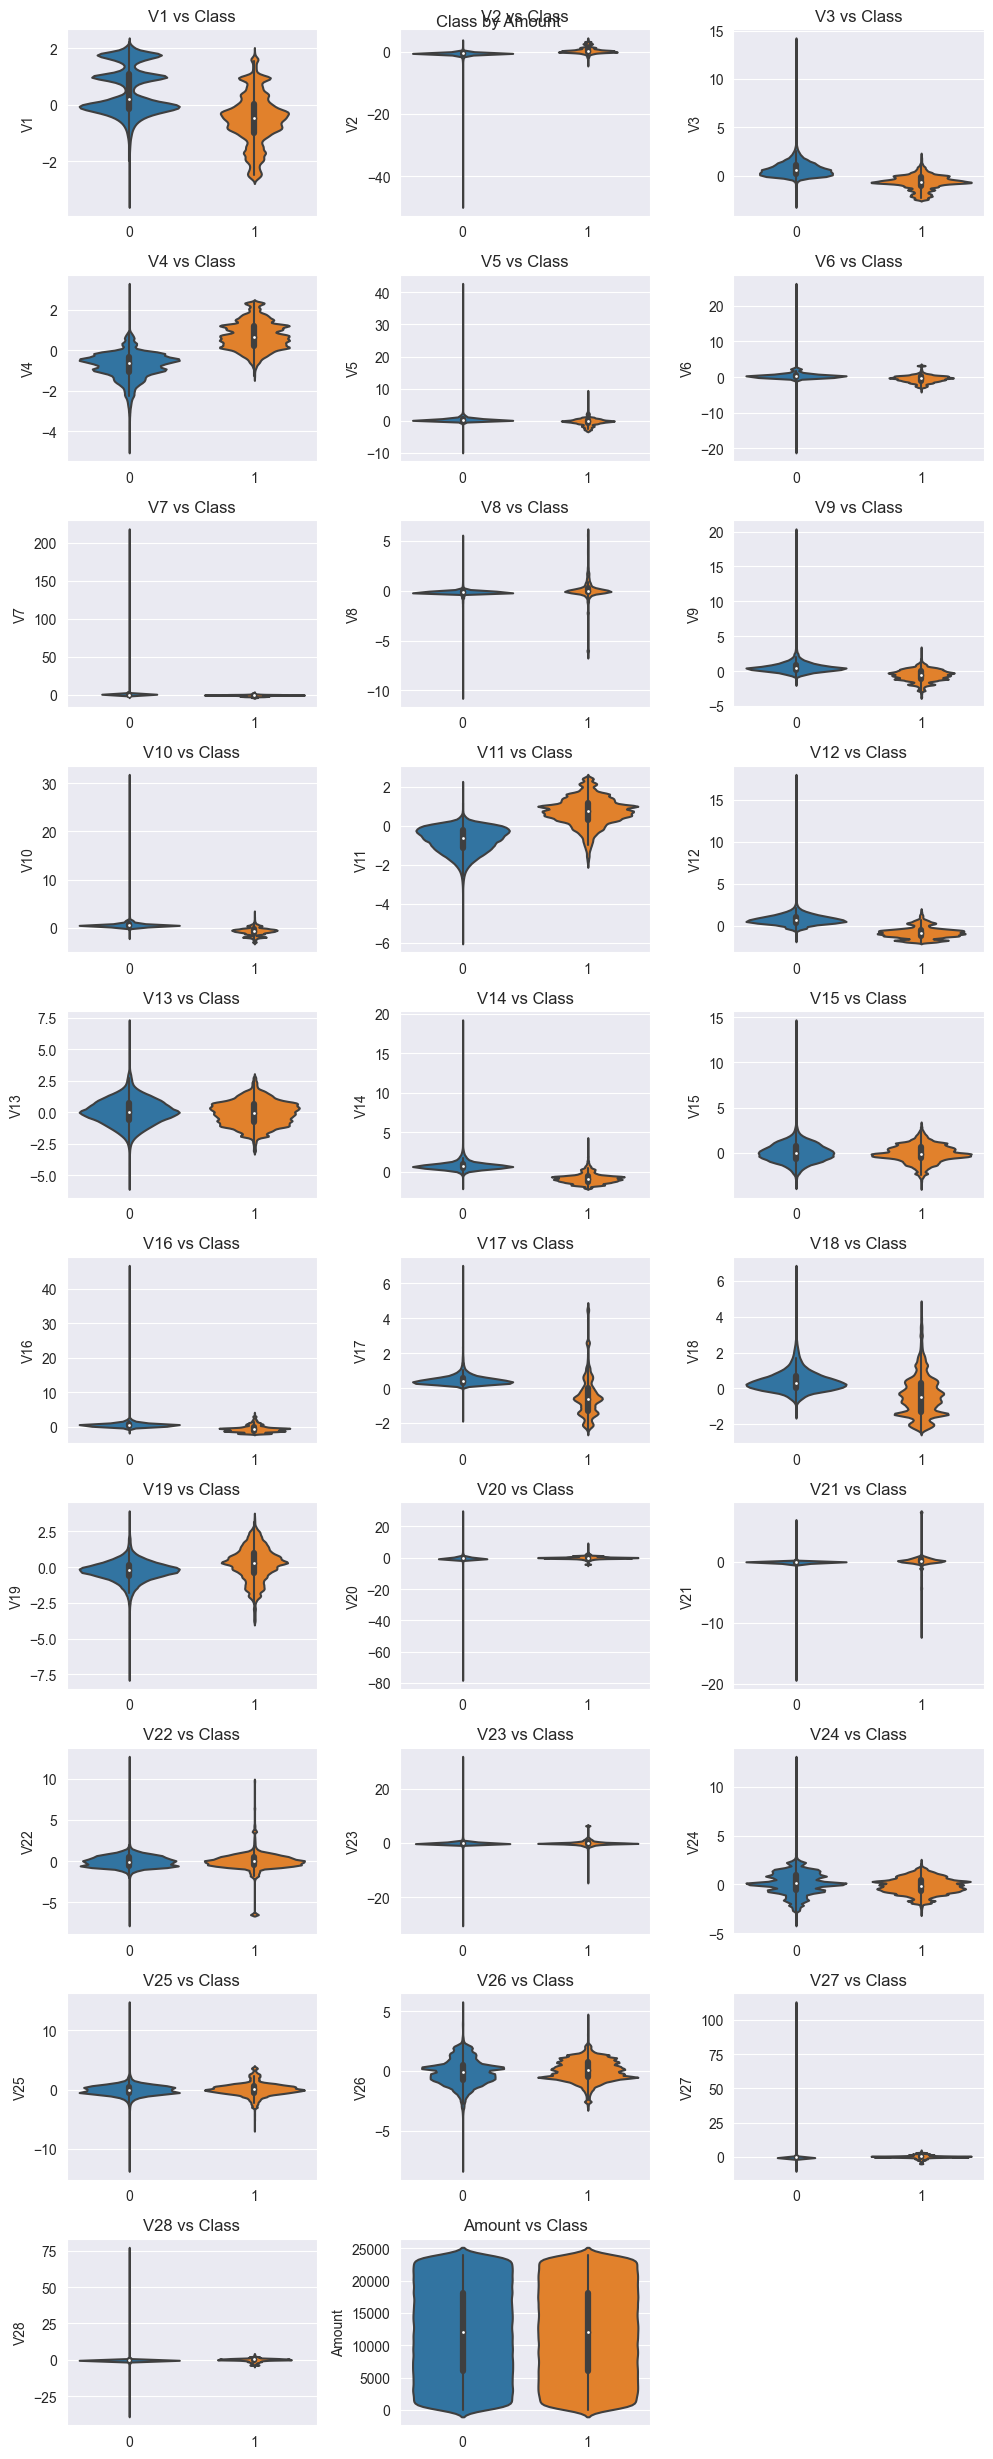

In [31]:
sns.set_style("darkgrid")
fig,axes = plt.subplots(nrows = 10, ncols = 3, figsize = (10, 25))
axes = axes.flat

for i,col in enumerate(cols_to_plot):
    sns.violinplot(df, 
                  x = "Class", 
                  y = col, 
                  ax = axes[i])
    axes[i].set_xlabel("")
    axes[i].set_title(f"{col} vs Class")
    
fig.delaxes(axes[29])
fig.suptitle(f"Class by {col}")
fig.tight_layout()
fig.show()

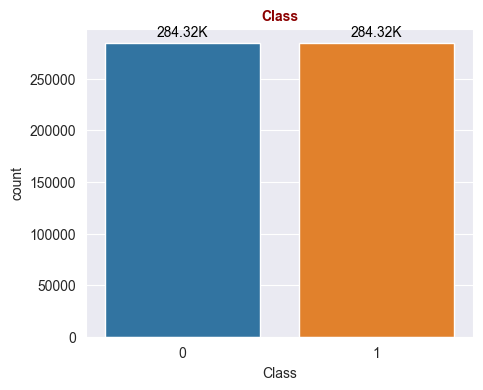

In [33]:
fig,ax = plt.subplots(figsize = (5,4))
sns.countplot(df, x = "Class", ax = ax)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Class", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

Preprocessing

In [34]:
# We divide into independent and dependent variables (target).
X = df.drop("Class", axis = 1)
y = df["Class"]

In [35]:
## We divide into training set and test set.
# We define our random seed.
SEED = 123
X_train, X_test, y_train, y_test = tts(X,y, 
                                       test_size = 0.3, 
                                       random_state = SEED, 
                                       shuffle = True, 
                                       stratify = y)

print(f"X train: {X_train.shape}")
print(f"X test: {X_test.shape}")

X train: (398041, 29)
X test: (170589, 29)


In [36]:
# We scale our 'Amount' variable.
column = ["Amount"]

preprocessor = ColumnTransformer(transformers = [('scaler', StandardScaler(),column)], 
                                remainder = "passthrough", 
                                verbose_feature_names_out = False).set_output(transform = "pandas")
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

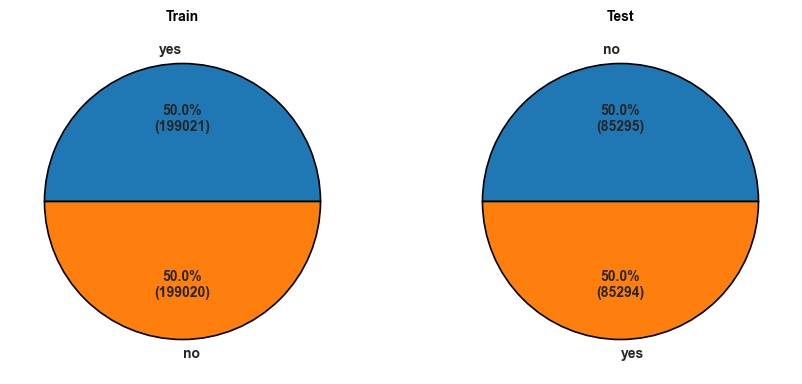

In [37]:
# Visualization of the objective variable in the training and test set.
df_pct_train = y_train.value_counts().to_frame().rename(index = {0:'no',
                                                                 1:'yes'})
df_pct_train = df_pct_train.rename(columns = {'y':'count'})

labels_train = df_pct_train.index.to_list()
values_train = df_pct_train.iloc[:,0]

df_pct_test = y_test.value_counts().to_frame().rename(index = {0:'no',
                                                               1:'yes'})
df_pct_test = df_pct_test.rename(columns = {'y':'count'})

labels_test = df_pct_test.index.to_list()
values_test = df_pct_test.iloc[:,0]


fig,axes = plt.subplots(1,2,figsize = (9,4))

def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"


axes[0].pie(x = values_train, labels = labels_train, autopct = autopct_fun(values_train),
            wedgeprops = {'linewidth':1.2, 'edgecolor':'black'},
            textprops = {'fontsize':10, 'fontweight':'bold'})
axes[0].set_title('Train', fontsize = 10, fontweight = 'bold', color = 'black')

axes[1].pie(x = values_test, labels = labels_test, autopct = autopct_fun(values_test),
            wedgeprops = {'linewidth':1.2, 'edgecolor':'black'},
            textprops = {'fontsize':10, 'fontweight':'bold'})
axes[1].set_title('Test', fontsize = 10, fontweight = 'bold', color = 'black')

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

Model

In [38]:
# We define our candidate models.
lr = LogisticRegression(random_state = SEED)
et = ExtraTreesClassifier(bootstrap = True, random_state = SEED)
rf = RandomForestClassifier(random_state = SEED)
xgb = XGBClassifier(objective = "binary:logistic", random_state = SEED)
lgbm = LGBMClassifier(random_state = SEED, verbose = -1)
cb = CatBoostClassifier(random_state = SEED,verbose = 0 ) 

models = {'Logistic_Regression':lr, 
         'Extra_Trees':et, 
         'Random_Forest':rf, 
         'XGB':xgb, 
         'LGBM':lgbm, 
         'CatBoost':cb}

In [39]:
# We store the accuracy metric
accuracy_train = {}
accuracy_test = {}

# We store the recall metric
recall_train = {}
recall_test = {}

# We store the f2 metric
f2_train = {}
f2_test = {}

# We store the confusion matrix
cf_matrix_train = {}
cf_matrix_test = {}

# We store the classification report
clf_report_train = {}
clf_report_test = {}

for model_name, model in models.items():
    start = time.time()
    # Fit model
    model.fit(X_train_prep, y_train)
    end = time.time()
    print(f"* {model_name} => Total training time = {end-start}")
    # Predictions
    y_pred_train = model.predict(X_train_prep)
    y_pred_test = model.predict(X_test_prep)
    
    # Accuracy score
    accuracy_train[model_name] = accuracy_score(np.array(y_train), y_pred_train)
    accuracy_test[model_name] = accuracy_score(np.array(y_test), y_pred_test)
    
    # Recall score
    recall_train[model_name] = recall_score(np.array(y_train), y_pred_train)
    recall_test[model_name] = recall_score(np.array(y_test), y_pred_test)
    
    # F2 score
    f2_train[model_name] = fbeta_score(np.array(y_train), y_pred_train, beta = 2)
    f2_test[model_name] = fbeta_score(np.array(y_test), y_pred_test, beta = 2)
    
    # Confusion Matrix
    cf_matrix_train[model_name] = confusion_matrix(np.array(y_train), y_pred_train)
    cf_matrix_test[model_name] = confusion_matrix(np.array(y_test), y_pred_test)
    
    # Classification Report
    clf_report_train[model_name] = classification_report(np.array(y_train), y_pred_train)
    clf_report_test[model_name] = classification_report(np.array(y_test), y_pred_test)

* Logistic_Regression => Total training time = 1.8889045715332031
* Extra_Trees => Total training time = 31.58647084236145
* Random_Forest => Total training time = 687.4275193214417
* XGB => Total training time = 2.5649921894073486
* LGBM => Total training time = 2.078157424926758
* CatBoost => Total training time = 41.15875577926636


In [40]:
# Plot metrics
def plot_metric(metric_train:dict, metric_test:dict, metric_name:str):
    df_metric_train = pd.DataFrame.from_dict(metric_train, orient = 'index').rename(columns = {0:'Train'})
    df_metric_test = pd.DataFrame.from_dict(metric_test, orient = 'index').rename(columns = {0:'Test'})
    df_metric = pd.merge(df_metric_train, df_metric_test, left_index = True, right_index = True)
    df_metric = df_metric.sort_values(['Train', 'Test'], ascending = False)
    
    fig,ax = plt.subplots(figsize = (15, 6))
    n = len(df_metric.index)
    x = np.arange(n)
    width = 0.3

    rects1 = ax.bar(x = x-width, height = df_metric.iloc[:,0], width = width)
    rects2 = ax.bar(x = x, height = df_metric.iloc[:,1], width = width)
    ax.set_xticks(x-0.15, df_metric.index.to_list())
    ax.set_xlabel('Models', fontsize = 10, fontweight = 'bold', color = 'darkblue')
    ax.set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'darkblue')
    ax.set_title(f'Metric of performance: {metric_name}', fontsize = 12, fontweight = 'bold', color = 'darkred')

    def autolabel(rects):
      for rect in rects:
        height = rect.get_height()
        ax.annotate(text = f'{round(height,5)}',
                    xy = (rect.get_x()+rect.get_width()/2, height),
                    xytext = (0,3),
                    textcoords = 'offset points',
                    ha = 'center',
                    va = 'bottom',
                    size = 8,
                    weight = 'bold',
                    color = 'black')

    autolabel(rects1)
    autolabel(rects2)
    ax.legend(["Train", "Test"])
    fig.show()

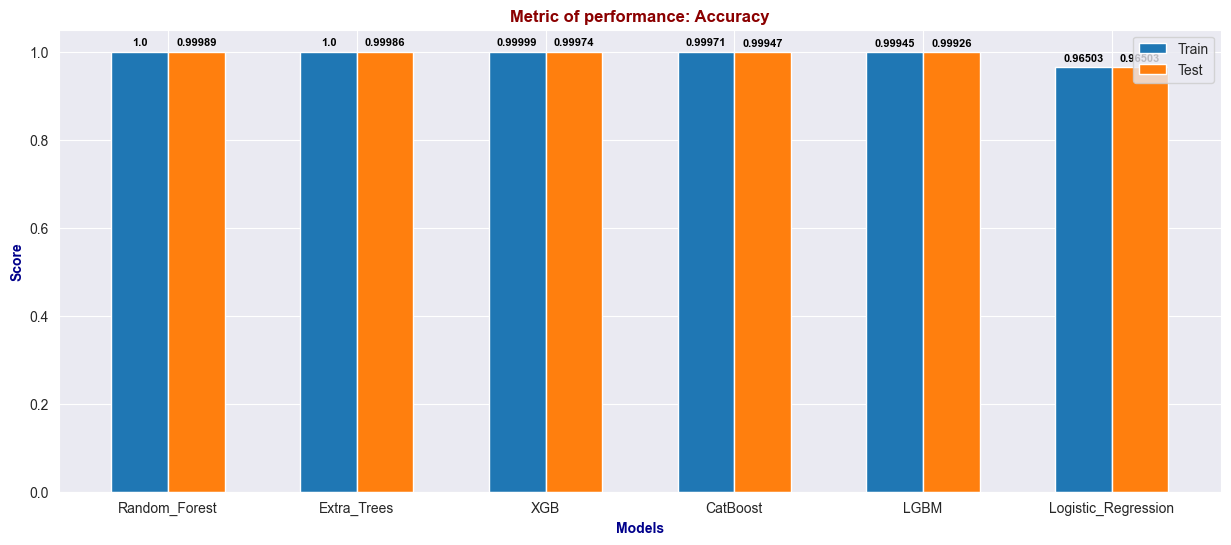

In [41]:
#================================== Accuracy =============================================
plot_metric(accuracy_train, accuracy_test, "Accuracy")

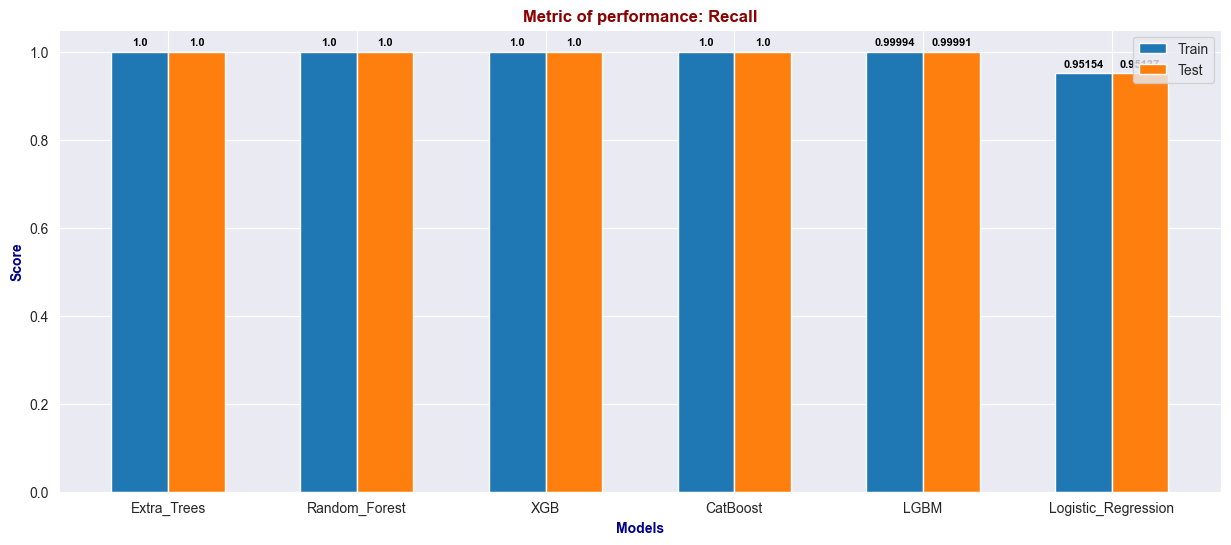

In [42]:
#==================================== Recall ============================================
plot_metric(recall_train, recall_test, "Recall")

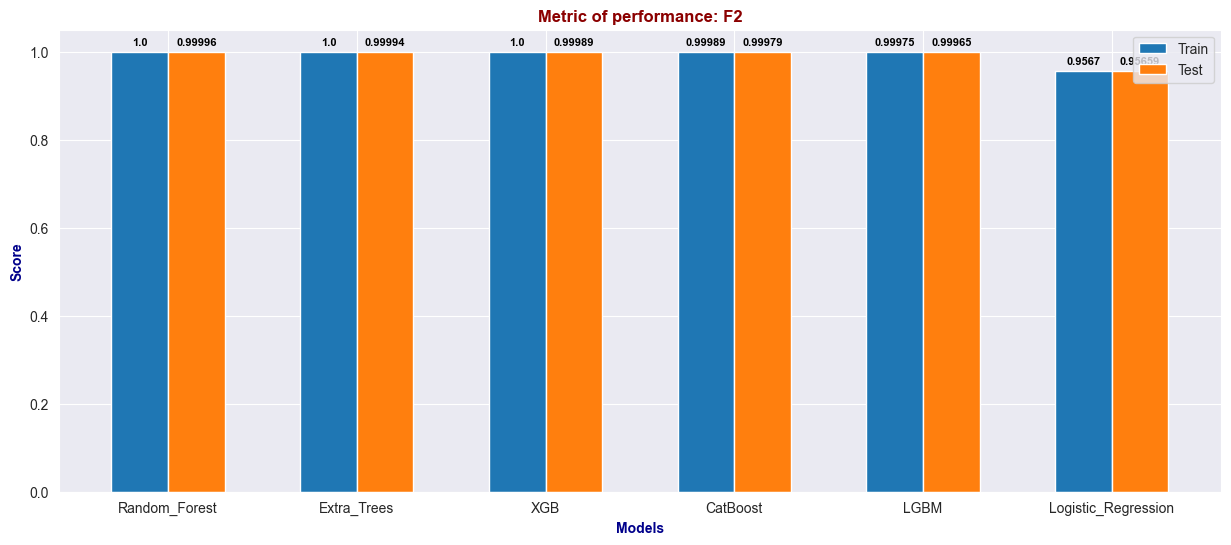

In [43]:
#==================================== F2 score ===========================================
plot_metric(f2_train, f2_test, "F2")

In [44]:
## Confusion Matrix plot
def confusion_matrix_plot (cf_matrix_train,
                           cf_matrix_test,
                           classes:list)->None:

    """
    Function to plot the confusion matrices for the training and test set.

    Args:

      - cf_matrix_train(np.ndarray): confusion matrix of training set.
      - cf_matrix_test(np.ndarray): confusion matrix of testing set.
      - classes(list): list of containing the classes of the target variable.

    Return:
      - Confusion Matrix plots
    """

    # We calculate the confusion matrices for training and testing.
    confusion_train = cf_matrix_train
    confusion_test = cf_matrix_test

    # Calculate the percentages
    sumatoria_train = np.sum(confusion_train, axis = 1)
    porcentajes_train = confusion_train / sumatoria_train[:,np.newaxis]*100

    sumatoria_test = np.sum(confusion_test, axis = 1)
    porcentajes_test = confusion_test / sumatoria_test[:,np.newaxis]*100


    etiquetas_train = [['{} \n({:.1f}%)'.format(val, porc) for val,porc in zip(row,porc_row)] for row, porc_row in zip(confusion_train, porcentajes_train)]

    etiquetas_test = [['{} \n({:.1f}%)'.format(val, porc) for val,porc in zip(row,porc_row)] for row, porc_row in zip(confusion_test, porcentajes_test)]


    fig,axes = plt.subplots(1,2,figsize=(9,4))
    sns.heatmap(confusion_train,
                annot = np.array(etiquetas_train),
                fmt = '',
                cmap = 'Blues',
                cbar = False,
                square = True,
                linewidths = 0.7,
                linecolor = 'white',
                ax = axes[0])
    sns.heatmap(confusion_test,
                annot = np.array(etiquetas_test),
                fmt = '',
                cmap = 'Oranges',
                cbar = False,
                square = True,
                linewidths = 0.7,
                linecolor = 'white',
                ax = axes[1])
    # Add the texts TP, FN, FP, TN to the train matrix
    axes[0].text(0.5, 0.65, 'TN', ha='center', va='center', fontsize=9, fontweight='bold')
    axes[0].text(1.5, 0.65, 'FP', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[0].text(0.5, 1.65, 'FN', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[0].text(1.5, 1.65, 'TP', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[0].set_title('Confusion Matrix Train',fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Predicted', fontsize=10, fontweight='bold')
    axes[0].set_ylabel('Real', fontsize=10, fontweight='bold')
    axes[0].set_xticklabels(classes)
    axes[0].set_yticklabels(classes)
    axes[0].tick_params(rotation=0, size = 8)

    # Add the texts TP, FN, FP, TN to the test matrix
    axes[1].text(0.5, 0.65, 'TN', ha='center', va='center', fontsize=9, fontweight='bold')
    axes[1].text(1.5, 0.65, 'FP', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[1].text(0.5, 1.65, 'FN', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[1].text(1.5, 1.65, 'TP', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[1].set_title('Confusion Matrix Test',fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Predicted', fontsize=10, fontweight='bold')
    axes[1].set_ylabel('Real', fontsize=10, fontweight='bold')
    axes[1].set_xticklabels(classes)
    axes[1].set_yticklabels(classes)
    axes[1].tick_params(rotation=0, size = 8)

    fig.subplots_adjust(top=0.9)
    fig.tight_layout()
    plt.show()

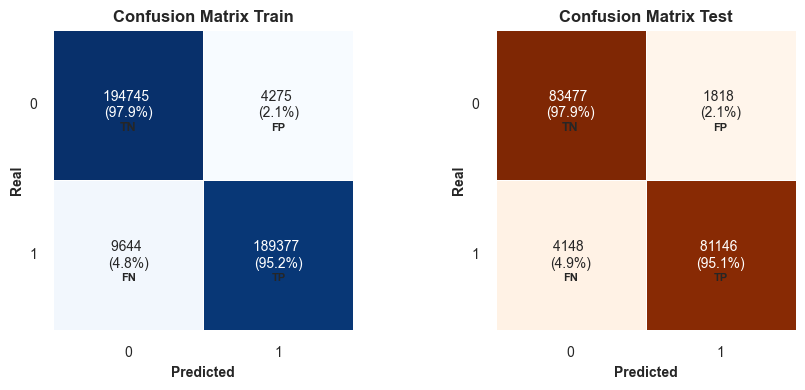

In [45]:
#================================= Logistic Regression =========================
confusion_matrix_plot(cf_matrix_train['Logistic_Regression'],
                      cf_matrix_test['Logistic_Regression'],
                      ["0","1"])

In [46]:
print("=="*30)
print(" "*15, "Classification Report Train")
print("=="*30)
print(clf_report_train["Logistic_Regression"])
print("=="*30)
print(" "*15, "Classification Report Test")
print("=="*30)
print(clf_report_test["Logistic_Regression"])

                Classification Report Train
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    199020
           1       0.98      0.95      0.96    199021

    accuracy                           0.97    398041
   macro avg       0.97      0.97      0.97    398041
weighted avg       0.97      0.97      0.97    398041

                Classification Report Test
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     85295
           1       0.98      0.95      0.96     85294

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589



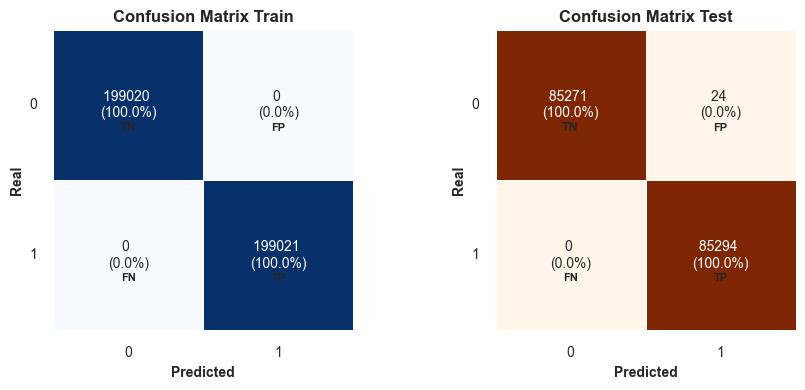

In [47]:
#================================= Extra Trees ================================
confusion_matrix_plot(cf_matrix_train['Extra_Trees'],
                      cf_matrix_test['Extra_Trees'],
                      ["0","1"])

In [48]:
print("=="*30)
print(" "*15, "Classification Report Train")
print("=="*30)
print(clf_report_train["Extra_Trees"])
print("=="*30)
print(" "*15, "Classification Report Test")
print("=="*30)
print(clf_report_test["Extra_Trees"])

                Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199021

    accuracy                           1.00    398041
   macro avg       1.00      1.00      1.00    398041
weighted avg       1.00      1.00      1.00    398041

                Classification Report Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



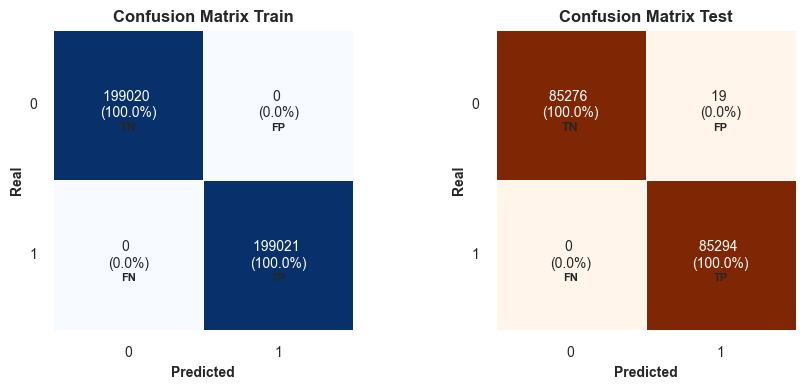

In [49]:
#================================= Random Forest ================================
confusion_matrix_plot(cf_matrix_train['Random_Forest'],
                      cf_matrix_test['Random_Forest'],
                      ["0","1"])

In [52]:
print("=="*30)
print(" "*15, "Classification Report Train")
print("=="*30)
print(clf_report_train["Random_Forest"])
print("=="*30)
print(" "*15, "Classification Report Test")
print("=="*30)
print(clf_report_test["Random_Forest"])

                Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199021

    accuracy                           1.00    398041
   macro avg       1.00      1.00      1.00    398041
weighted avg       1.00      1.00      1.00    398041

                Classification Report Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



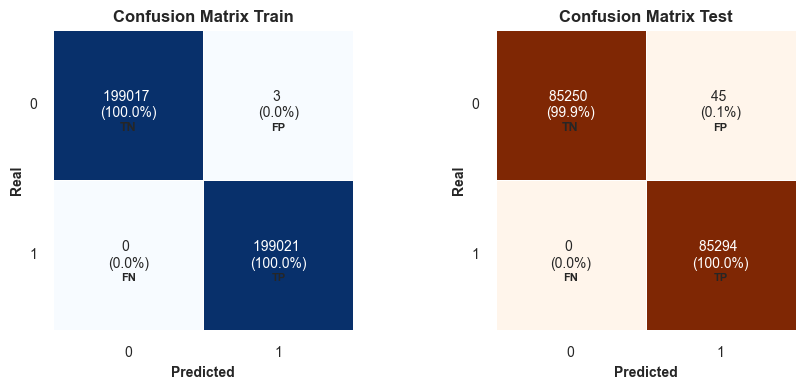

In [53]:
#================================= XGBoost =====================================
confusion_matrix_plot(cf_matrix_train['XGB'],
                      cf_matrix_test['XGB'],
                      ["0","1"])

In [54]:
print("=="*30)
print(" "*15, "Classification Report Train")
print("=="*30)
print(clf_report_train["XGB"])
print("=="*30)
print(" "*15, "Classification Report Test")
print("=="*30)
print(clf_report_test["XGB"])

                Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199021

    accuracy                           1.00    398041
   macro avg       1.00      1.00      1.00    398041
weighted avg       1.00      1.00      1.00    398041

                Classification Report Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



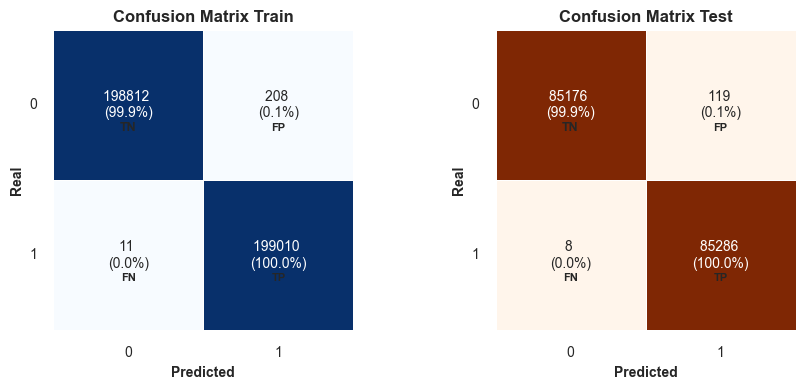

In [55]:
#======================================= LGBM ===========================================
confusion_matrix_plot(cf_matrix_train['LGBM'],
                      cf_matrix_test['LGBM'],
                      ["0","1"])

In [56]:
print("=="*30)
print(" "*15, "Classification Report Train")
print("=="*30)
print(clf_report_train["LGBM"])
print("=="*30)
print(" "*15, "Classification Report Test")
print("=="*30)
print(clf_report_test["LGBM"])

                Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199021

    accuracy                           1.00    398041
   macro avg       1.00      1.00      1.00    398041
weighted avg       1.00      1.00      1.00    398041

                Classification Report Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



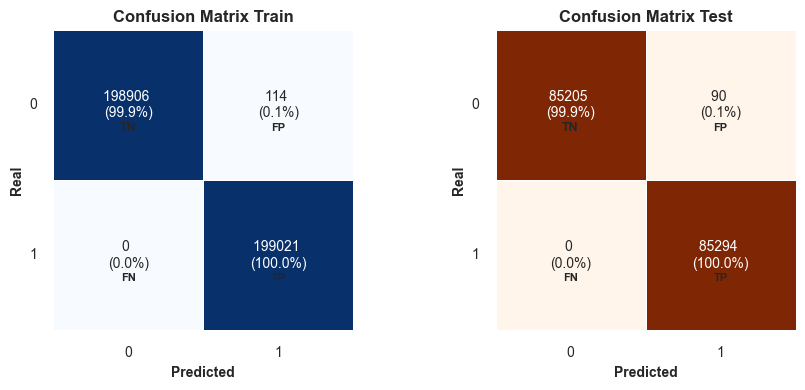

In [57]:
#================================= CatBoost =====================================
confusion_matrix_plot(cf_matrix_train['CatBoost'],
                      cf_matrix_test['CatBoost'],
                      ["0","1"])

In [58]:
print("=="*30)
print(" "*15, "Classification Report Train")
print("=="*30)
print(clf_report_train["CatBoost"])
print("=="*30)
print(" "*15, "Classification Report Test")
print("=="*30)
print(clf_report_test["CatBoost"])

                Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199021

    accuracy                           1.00    398041
   macro avg       1.00      1.00      1.00    398041
weighted avg       1.00      1.00      1.00    398041

                Classification Report Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



 ** Conclusion: The model that gave us the best metrics and the fewest false negatives (FN) was Random Forest.